## Importing Library

In [287]:
# prediction
def check_correct(predict, y):
    result = {}
    result['resistant-correct'] = 0
    result['resistant-wrong'] = 0
    result['sensitive-correct'] = 0
    result['sensitive-wrong'] = 0

    for i in range(len(predict)) :
        if predict[i] == y[i] :
            if y[i] == 0 :
                result['sensitive-correct'] += 1
            else :
                result['resistant-correct'] += 1
        else :
            if y[i] == 0 :
                result['sensitive-wrong'] += 1
            else :
                result['resistant-wrong'] += 1

    #for result_k, result_v in result.items():
    #    print(result_k +" : "+ str(result_v))
    sensitivity=result['resistant-correct']/(result['resistant-correct']+result['resistant-wrong'])
    specificity=result['sensitive-correct']/(result['sensitive-correct']+result['sensitive-wrong'])
    #print("Sensitivity :", sensitivity)
    #print("Specificity :", specificity)
    return sensitivity, specificity

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential 
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10)

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

1.5.0


## Import Data

In [288]:
path = "C://test/TC_intersect_subsamples/"
types = ["inter_OV_Var_200", "inter_OV_Annotation3000_100", 
         "inter_OV_CV_400", "inter_OV_new_Diff_400",
         "inter_OV_Clin", 
         "inter_OV_SNV_ch" 
         ]

file_1 = path+types[0]+".csv"
file_2 = path+types[1]+".csv"
file_3 = path+types[2]+".csv"
file_4 = path+types[3]+".csv"
file_5 = path+types[4]+".csv"
file_6 = path+types[5]+".csv"

idx_col = 0

data_1 = pd.read_csv(file_1,index_col=idx_col)
data_2 = pd.read_csv(file_2,index_col=idx_col)
data_3 = pd.read_csv(file_3,index_col=idx_col)
data_4 = pd.read_csv(file_4,index_col=idx_col)
data_5 = pd.read_csv(file_5,index_col=idx_col)
data_6 = pd.read_csv(file_6,index_col=idx_col)

sample_1,features_1 = data_1.shape
sample_2,features_2 = data_2.shape
sample_3,features_3 = data_3.shape
sample_4,features_4 = data_4.shape
sample_5,features_5 = data_5.shape
sample_6,features_6 = data_6.shape

# Data frame include index & Platinum_Status column, substract 2 to calculate real number of features 
[features_1, features_2, features_3, features_4, features_5, features_6] = [features_1-2, features_2-2, features_3-2, features_4-2, features_5-2, features_6-2]

print("[1] file_name: ", types[0], "\nsample : {}  \nfeatures : {}".format(sample_1,features_1))
print("[2] file_name: ", types[1], "\nsample : {}  \nfeatures : {}".format(sample_2,features_2))
print("[3] file_name: ", types[2], "\nsample : {}  \nfeatures : {}".format(sample_3,features_3))
print("[4] file_name: ", types[3], "\nsample : {}  \nfeatures : {}".format(sample_4,features_4))
print("[5] file_name: ", types[4], "\nsample : {}  \nfeatures : {}".format(sample_5,features_5))
print("[6] file_name: ", types[5], "\nsample : {}  \nfeatures : {}".format(sample_6,features_6))


[1] file_name:  inter_OV_Var_200 
sample : 196  
features : 200
[2] file_name:  inter_OV_Annotation3000_100 
sample : 196  
features : 100
[3] file_name:  inter_OV_CV_400 
sample : 196  
features : 400
[4] file_name:  inter_OV_new_Diff_400 
sample : 196  
features : 400
[5] file_name:  inter_OV_Clin 
sample : 196  
features : 35
[6] file_name:  inter_OV_SNV_ch 
sample : 196  
features : 282


## Split Train Test Data

In [289]:
print('######################################  '+types[0]+'  ######################################')

train_data_1 = data_1.iloc[list(data_1.iloc[:,-1]!=1)]
test_data_1 = data_1.iloc[list(data_1.iloc[:,-1]==1)]

y_val_1 = train_data_1.Platinum_Status
x_val_1 = train_data_1.drop(["Platinum_Status","index"],axis=1)
test_y_val_1 = test_data_1.Platinum_Status
test_x_val_1 = test_data_1.drop(["Platinum_Status","index"],axis=1)

print(x_val_1.shape, test_x_val_1.shape)

######################################  inter_OV_Var_200  ######################################
(156, 200) (40, 200)


In [290]:
print('######################################  '+types[1]+'  ######################################')

train_data_2 = data_2.iloc[list(data_2.iloc[:,-1]!=1)]
test_data_2 = data_2.iloc[list(data_2.iloc[:,-1]==1)]

y_val_2 = train_data_2.Platinum_Status
x_val_2 = train_data_2.drop(["Platinum_Status","index"],axis=1)
test_y_val_2 = test_data_2.Platinum_Status
test_x_val_2 = test_data_2.drop(["Platinum_Status","index"],axis=1)

print(x_val_2.shape, test_x_val_2.shape)

######################################  inter_OV_Annotation3000_100  ######################################
(156, 100) (40, 100)


In [291]:
print('######################################  '+types[2]+'  ######################################')

train_data_3 = data_3.iloc[list(data_3.iloc[:,-1]!=1)]
test_data_3 = data_3.iloc[list(data_3.iloc[:,-1]==1)]

y_val_3 = train_data_3.Platinum_Status
x_val_3 = train_data_3.drop(["Platinum_Status","index"],axis=1)
test_y_val_3 = test_data_3.Platinum_Status
test_x_val_3 = test_data_3.drop(["Platinum_Status","index"],axis=1)

print(x_val_3.shape, test_x_val_3.shape)

######################################  inter_OV_CV_400  ######################################
(156, 400) (40, 400)


In [292]:
print('######################################  '+types[3]+'  ######################################')

train_data_4 = data_4.iloc[list(data_4.iloc[:,-1]!=1)]
test_data_4 = data_4.iloc[list(data_4.iloc[:,-1]==1)]

y_val_4 = train_data_4.Platinum_Status
x_val_4 = train_data_4.drop(["Platinum_Status","index"],axis=1)
test_y_val_4 = test_data_4.Platinum_Status
test_x_val_4 = test_data_4.drop(["Platinum_Status","index"],axis=1)

print(x_val_4.shape, test_x_val_4.shape)

######################################  inter_OV_new_Diff_400  ######################################
(156, 400) (40, 400)


In [293]:
print('######################################  '+types[4]+'  ######################################')

train_data_5 = data_5.iloc[list(data_5.iloc[:,-1]!=1)]
test_data_5 = data_5.iloc[list(data_5.iloc[:,-1]==1)]

y_val_5 = train_data_5.Platinum_Status
x_val_5 = train_data_5.drop(["Platinum_Status","index"],axis=1)
test_y_val_5 = test_data_5.Platinum_Status
test_x_val_5 = test_data_5.drop(["Platinum_Status","index"],axis=1)

print(x_val_5.shape, test_x_val_5.shape)

######################################  inter_OV_Clin  ######################################
(156, 35) (40, 35)


In [294]:
print('######################################  '+types[5]+'  ######################################')

train_data_6 = data_6.iloc[list(data_6.iloc[:,-1]!=1)]
test_data_6 = data_6.iloc[list(data_6.iloc[:,-1]==1)]

y_val_6 = train_data_6.Platinum_Status
x_val_6 = train_data_6.drop(["Platinum_Status","index"],axis=1)
test_y_val_6 = test_data_6.Platinum_Status
test_x_val_6 = test_data_6.drop(["Platinum_Status","index"],axis=1)

print(x_val_6.shape, test_x_val_6.shape)

######################################  inter_OV_SNV_ch  ######################################
(156, 282) (40, 282)


## Modeling Seperate Model

###  Building seperate model for ensemble(model 1, 2, 3)

In [295]:
from keras.layers import Input, Dense
from keras.models import Model

print(features_1, features_2, features_3, features_4, features_5, features_6)

200 100 400 400 35 282


In [296]:
print('######################################  '+types[0]+'  ######################################')

keep_prob_1 = 0.5

input_m_1 = Input(shape=(features_1,))
m_1_dp = Dropout(keep_prob_1)(input_m_1)

for i in [100, 150]:
  m_1 = Dense(i,activation='relu')(m_1_dp)

m_1_dp = Dropout(keep_prob_1)(m_1)
m_1_final = m_1_dp
output_m_1 = Dense(1, activation="sigmoid")(m_1_final)

model_1 = Model(inputs=input_m_1,outputs=output_m_1)

model_1.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_1.fit(x_val_1, y_val_1, epochs=20, batch_size=10)

m_1_tr_loss,m_1_tr_accuracy=model_1.evaluate(x_val_1,y_val_1)
m_1_loss,m_1_accuracy= model_1.evaluate(test_x_val_1,test_y_val_1)

m_1_predictions = model_1.predict(x_val_1)
labeled_m_1_predictions = np.where(m_1_predictions > 0.5, 1, 0).flatten()
m_1_tr_sensitivity, m_1_tr_specificity = check_correct(labeled_m_1_predictions, y_val_1)
m_1_test_predictions = model_1.predict(test_x_val_1)
labeled_m_1_test_predictions = np.where(m_1_test_predictions > 0.5, 1, 0).flatten()
m_1_sensitivity, m_1_specificity = check_correct(labeled_m_1_test_predictions, test_y_val_1)
#m_1_test_predictions = m_1_test_predictions.flatten()
m_1_test_predictions_flat = m_1_test_predictions[:,0]

df_1 = pd.DataFrame(data={"patient":list(test_data_1.index), "hypothesis_1": list(m_1_test_predictions_flat), 
                        "prediction":list(labeled_m_1_test_predictions), "Platinum_Status":list(test_y_val_1)})
df_1.to_csv("../result/prediction_result_m_1.csv", index=False, header=True, columns = ["patient", "hypothesis_1", "prediction", "Platinum_Status"])


print("Train Accuracy: {}".format(m_1_tr_accuracy))
print("Train Sensitivities & Specificities : "+str(m_1_tr_sensitivity)+", "+str(m_1_tr_specificity))
print("Test Accuracy: {}".format(m_1_accuracy))
print("Test Sensitivities & Specificities : "+str(m_1_sensitivity)+", "+str(m_1_specificity))

model_1.save("../models/Ovary/m_1.h5")

######################################  inter_OV_Var_200  ######################################
Epoch 1/20
156/156 [==============================] - 2s 16ms/step - loss: 1.1480 - acc: 0.5577
Epoch 2/20
156/156 [==============================] - 0s 486us/step - loss: 1.0085 - acc: 0.5577
Epoch 3/20
156/156 [==============================] - 0s 607us/step - loss: 1.0336 - acc: 0.5192
Epoch 4/20
156/156 [==============================] - 0s 556us/step - loss: 0.9133 - acc: 0.5577
Epoch 5/20
156/156 [==============================] - 0s 537us/step - loss: 0.7959 - acc: 0.5641
Epoch 6/20
156/156 [==============================] - 0s 537us/step - loss: 0.7485 - acc: 0.6282
Epoch 7/20
156/156 [==============================] - 0s 569us/step - loss: 0.8666 - acc: 0.5449
Epoch 8/20
156/156 [==============================] - 0s 543us/step - loss: 0.7507 - acc: 0.5833
Epoch 9/20
156/156 [==============================] - 0s 569us/step - loss: 0.7001 - acc: 0.6410
Epoch 10/20
156/156 [==========

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\engine\saving.py:126: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [297]:
print('######################################  '+types[1]+'  ######################################')

keep_prob_2 = 0.5

input_m_2 = Input(shape=(features_2,))
m_2_dp = Dropout(keep_prob_2)(input_m_2)

for i in [100, 150]:
  m_2 = Dense(i,activation='relu')(m_2_dp)

m_2_dp = Dropout(keep_prob_2)(m_2)
m_2_final = m_2_dp
output_m_2 = Dense(1, activation="sigmoid")(m_2_final)
model_2 = Model(inputs=input_m_2,outputs=output_m_2)

model_2.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_2.fit(x_val_2, y_val_2, epochs=20, batch_size=10)

m_2_tr_loss,m_2_tr_accuracy=model_2.evaluate(x_val_2,y_val_2)
m_2_loss,m_2_accuracy= model_2.evaluate(test_x_val_2,test_y_val_2)

m_2_predictions = model_2.predict(x_val_2)
labeled_m_2_predictions = np.where(m_2_predictions > 0.5, 1, 0).flatten()
m_2_tr_sensitivity, m_2_tr_specificity = check_correct(labeled_m_2_predictions, y_val_2)
m_2_test_predictions = model_2.predict(test_x_val_2)
labeled_m_2_test_predictions = np.where(m_2_test_predictions > 0.5, 1, 0).flatten()
m_2_sensitivity, m_2_specificity = check_correct(labeled_m_2_test_predictions, test_y_val_2)
#m_2_test_predictions = m_2_test_predictions.flatten()
m_2_test_predictions_flat = m_2_test_predictions[:,0]

df_2 = pd.DataFrame(data={"patient":list(test_data_2.index), "hypothesis_2": list(m_2_test_predictions_flat), 
  "prediction":list(labeled_m_2_test_predictions), "Platinum_Status":list(test_y_val_2)})
df_2.to_csv("../result/prediction_result_m_2.csv", index=False, header=True, columns = ["patient", "hypothesis_2", "prediction", "Platinum_Status"])


print("Train Accuracy: {}".format(m_2_tr_accuracy))
print("Train Sensitivities & Specificities : "+str(m_2_tr_sensitivity)+", "+str(m_2_tr_specificity))
print("Test Accuracy: {}".format(m_2_accuracy))
print("Test Sensitivities & Specificities : "+str(m_2_sensitivity)+", "+str(m_2_specificity))

model_2.save("../models/Ovary/m_2.h5")

######################################  inter_OV_Annotation3000_100  ######################################
Epoch 1/20
156/156 [==============================] - 2s 15ms/step - loss: 0.9397 - acc: 0.5256
Epoch 2/20
156/156 [==============================] - 0s 524us/step - loss: 0.8542 - acc: 0.5192
Epoch 3/20
156/156 [==============================] - 0s 492us/step - loss: 0.8914 - acc: 0.4872
Epoch 4/20
156/156 [==============================] - 0s 479us/step - loss: 0.7756 - acc: 0.5449
Epoch 5/20
156/156 [==============================] - 0s 479us/step - loss: 0.8389 - acc: 0.5256
Epoch 6/20
156/156 [==============================] - 0s 492us/step - loss: 0.7904 - acc: 0.5000
Epoch 7/20
156/156 [==============================] - 0s 511us/step - loss: 0.7283 - acc: 0.5513
Epoch 8/20
156/156 [==============================] - 0s 454us/step - loss: 0.7320 - acc: 0.5962
Epoch 9/20
156/156 [==============================] - 0s 492us/step - loss: 0.6501 - acc: 0.6538
Epoch 10/20
156/156 

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\engine\saving.py:126: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [298]:
print('######################################  '+types[2]+'  ######################################')

keep_prob_3 = 0.5

input_m_3 = Input(shape=(features_3,))
m_3_dp = Dropout(keep_prob_3)(input_m_3)

for i in [100, 150]:
  m_3 = Dense(i,activation='relu')(m_3_dp)

m_3_dp = Dropout(keep_prob_3)(m_3)
m_3_final = m_3_dp
output_m_3 = Dense(1, activation="sigmoid")(m_3_final)
model_3 = Model(inputs=input_m_3,outputs=output_m_3)

model_3.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_3.fit(x_val_3, y_val_3, epochs=20, batch_size=10)

m_3_tr_loss,m_3_tr_accuracy=model_3.evaluate(x_val_3,y_val_3)
m_3_loss,m_3_accuracy= model_3.evaluate(test_x_val_3,test_y_val_3)

m_3_predictions = model_3.predict(x_val_3)
labeled_m_3_predictions = np.where(m_3_predictions > 0.5, 1, 0).flatten()
m_3_tr_sensitivity, m_3_tr_specificity = check_correct(labeled_m_3_predictions, y_val_3)
m_3_test_predictions = model_3.predict(test_x_val_3)
labeled_m_3_test_predictions = np.where(m_3_test_predictions > 0.5, 1, 0).flatten()
m_3_sensitivity, m_3_specificity = check_correct(labeled_m_3_test_predictions, test_y_val_3)
#m_3_test_predictions = m_3_test_predictions.flatten()
m_3_test_predictions_flat = m_3_test_predictions[:,0]

df_3 = pd.DataFrame(data={"patient":list(test_data_3.index), "hypothesis_3": list(m_3_test_predictions_flat), 
  "prediction":list(labeled_m_3_test_predictions), "Platinum_Status":list(test_y_val_3)})
df_3.to_csv("../result/prediction_result_m_3.csv", index=False, header=True, columns = ["patient", "hypothesis_3", "prediction", "Platinum_Status"])


print("Train Accuracy: {}".format(m_3_tr_accuracy))
print("Train Sensitivities & Specificities : "+str(m_3_tr_sensitivity)+", "+str(m_3_tr_specificity))
print("Test Accuracy: {}".format(m_3_accuracy))
print("Test Sensitivities & Specificities : "+str(m_3_sensitivity)+", "+str(m_3_specificity))

model_3.save("../models/Ovary/m_3.h5")

######################################  inter_OV_CV_400  ######################################
Epoch 1/20
156/156 [==============================] - 2s 15ms/step - loss: 0.7305 - acc: 0.5321
Epoch 2/20
156/156 [==============================] - 0s 620us/step - loss: 0.6396 - acc: 0.6410
Epoch 3/20
156/156 [==============================] - 0s 627us/step - loss: 0.5748 - acc: 0.6859
Epoch 4/20
156/156 [==============================] - 0s 614us/step - loss: 0.5673 - acc: 0.7372
Epoch 5/20
156/156 [==============================] - 0s 659us/step - loss: 0.5050 - acc: 0.7821
Epoch 6/20
156/156 [==============================] - 0s 595us/step - loss: 0.5199 - acc: 0.7436
Epoch 7/20
156/156 [==============================] - 0s 627us/step - loss: 0.4218 - acc: 0.8590
Epoch 8/20
156/156 [==============================] - 0s 607us/step - loss: 0.4469 - acc: 0.8333
Epoch 9/20
156/156 [==============================] - 0s 633us/step - loss: 0.4469 - acc: 0.7949
Epoch 10/20
156/156 [===========

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\engine\saving.py:126: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [299]:
print('######################################  '+types[3]+'  ######################################')

keep_prob_4 = 0.5

input_m_4 = Input(shape=(features_4,))
m_4_dp = Dropout(keep_prob_4)(input_m_4)

for i in [100, 150]:
  m_4 = Dense(i,activation='relu')(m_4_dp)

m_4_dp = Dropout(keep_prob_4)(m_4)
m_4_final = m_4_dp
output_m_4 = Dense(1, activation="sigmoid")(m_4_final)
model_4 = Model(inputs=input_m_4,outputs=output_m_4)

model_4.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_4.fit(x_val_4, y_val_4, epochs=20, batch_size=10)

m_4_tr_loss,m_4_tr_accuracy=model_4.evaluate(x_val_4,y_val_4)
m_4_loss,m_4_accuracy= model_4.evaluate(test_x_val_4,test_y_val_4)

m_4_predictions = model_4.predict(x_val_4)
labeled_m_4_predictions = np.where(m_4_predictions > 0.5, 1, 0).flatten()
m_4_tr_sensitivity, m_4_tr_specificity = check_correct(labeled_m_4_predictions, y_val_4)
m_4_test_predictions = model_4.predict(test_x_val_4)
labeled_m_4_test_predictions = np.where(m_4_test_predictions > 0.5, 1, 0).flatten()
m_4_sensitivity, m_4_specificity = check_correct(labeled_m_4_test_predictions, test_y_val_4)
#m_4_test_predictions = m_4_test_predictions.flatten()
m_4_test_predictions_flat = m_4_test_predictions[:,0]

df_4 = pd.DataFrame(data={"patient":list(test_data_4.index), "hypothesis_4": list(m_4_test_predictions_flat), 
  "prediction":list(labeled_m_4_test_predictions), "Platinum_Status":list(test_y_val_4)})
df_4.to_csv("../result/prediction_result_m_4.csv", index=False, header=True, columns = ["patient", "hypothesis_4", "prediction", "Platinum_Status"])


print("Train Accuracy: {}".format(m_4_tr_accuracy))
print("Train Sensitivities & Specificities : "+str(m_4_tr_sensitivity)+", "+str(m_4_tr_specificity))
print("Test Accuracy: {}".format(m_4_accuracy))
print("Test Sensitivities & Specificities : "+str(m_4_sensitivity)+", "+str(m_4_specificity))

model_4.save("../models/Ovary/m_4.h5")

######################################  inter_OV_new_Diff_400  ######################################
Epoch 1/20
156/156 [==============================] - 2s 15ms/step - loss: 1.5935 - acc: 0.4487
Epoch 2/20
156/156 [==============================] - 0s 575us/step - loss: 1.2799 - acc: 0.5000
Epoch 3/20
156/156 [==============================] - 0s 633us/step - loss: 0.8351 - acc: 0.6282
Epoch 4/20
156/156 [==============================] - 0s 633us/step - loss: 0.8799 - acc: 0.6410
Epoch 5/20
156/156 [==============================] - 0s 601us/step - loss: 0.7213 - acc: 0.6474
Epoch 6/20
156/156 [==============================] - 0s 627us/step - loss: 0.6369 - acc: 0.6731
Epoch 7/20
156/156 [==============================] - 0s 620us/step - loss: 0.5850 - acc: 0.6859
Epoch 8/20
156/156 [==============================] - 0s 633us/step - loss: 0.5828 - acc: 0.6923
Epoch 9/20
156/156 [==============================] - 0s 582us/step - loss: 0.6145 - acc: 0.6795
Epoch 10/20
156/156 [=====

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\engine\saving.py:126: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [300]:
print('######################################  '+types[4]+'  ######################################')

keep_prob_5 = 0.5

input_m_5 = Input(shape=(features_5,))
m_5_dp = Dropout(keep_prob_5)(input_m_5)

for i in [100, 150]:
  m_5 = Dense(i,activation='relu')(m_5_dp)

m_5_dp = Dropout(keep_prob_5)(m_5)
m_5_final = m_5_dp
output_m_5 = Dense(1, activation="sigmoid")(m_5_final)
model_5 = Model(inputs=input_m_5,outputs=output_m_5)

model_5.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_5.fit(x_val_5, y_val_5, epochs=20, batch_size=10)

m_5_tr_loss,m_5_tr_accuracy=model_5.evaluate(x_val_5,y_val_5)
m_5_loss,m_5_accuracy= model_5.evaluate(test_x_val_5,test_y_val_5)
m_5_predictions = model_5.predict(x_val_5)
labeled_m_5_predictions = np.where(m_5_predictions > 0.5, 1, 0).flatten()
m_5_tr_sensitivity, m_5_tr_specificity = check_correct(labeled_m_5_predictions, y_val_5)
m_5_test_predictions = model_5.predict(test_x_val_5)
labeled_m_5_test_predictions = np.where(m_5_test_predictions > 0.5, 1, 0).flatten()
m_5_sensitivity, m_5_specificity = check_correct(labeled_m_5_test_predictions, test_y_val_5)
#m_5_test_predictions = m_5_test_predictions.flatten()
m_5_test_predictions_flat = m_5_test_predictions[:,0]

df_5 = pd.DataFrame(data={"patient":list(test_data_5.index), "hypothesis_5": list(m_5_test_predictions_flat), 
  "prediction":list(labeled_m_5_test_predictions), "Platinum_Status":list(test_y_val_5)})
df_5.to_csv("../result/prediction_result_m_5.csv", index=False, header=True, columns = ["patient", "hypothesis_5", "prediction", "Platinum_Status"])


print("Train Accuracy: {}".format(m_5_tr_accuracy))
print("Train Sensitivities & Specificities : "+str(m_5_tr_sensitivity)+", "+str(m_5_tr_specificity))
print("Test Accuracy: {}".format(m_5_accuracy))
print("Test Sensitivities & Specificities : "+str(m_5_sensitivity)+", "+str(m_5_specificity))

model_5.save("../models/Ovary/m_5.h5")

######################################  inter_OV_Clin  ######################################
Epoch 1/20
156/156 [==============================] - 2s 15ms/step - loss: 0.9133 - acc: 0.4423
Epoch 2/20
156/156 [==============================] - 0s 537us/step - loss: 0.7612 - acc: 0.5833
Epoch 3/20
156/156 [==============================] - 0s 505us/step - loss: 0.7524 - acc: 0.5641
Epoch 4/20
156/156 [==============================] - 0s 473us/step - loss: 0.7198 - acc: 0.5769
Epoch 5/20
156/156 [==============================] - 0s 518us/step - loss: 0.6952 - acc: 0.6154
Epoch 6/20
156/156 [==============================] - 0s 467us/step - loss: 0.7286 - acc: 0.5449
Epoch 7/20
156/156 [==============================] - 0s 499us/step - loss: 0.6753 - acc: 0.5962
Epoch 8/20
156/156 [==============================] - 0s 479us/step - loss: 0.6364 - acc: 0.6474
Epoch 9/20
156/156 [==============================] - 0s 492us/step - loss: 0.6861 - acc: 0.6026
Epoch 10/20
156/156 [=============

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\engine\saving.py:126: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [301]:
print('######################################  '+types[5]+'  ######################################')

keep_prob_6 = 0.5

input_m_6 = Input(shape=(features_6,))
m_6_dp = Dropout(keep_prob_6)(input_m_6)

for i in [100, 150]:
  m_6 = Dense(i,activation='relu')(m_6_dp)

m_6_dp = Dropout(keep_prob_6)(m_6)
m_6_final = m_6_dp
output_m_6 = Dense(1, activation="sigmoid")(m_6_final)
model_6 = Model(inputs=input_m_6,outputs=output_m_6)

model_6.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_6.fit(x_val_6, y_val_6, epochs=20, batch_size=10)

m_6_tr_loss,m_6_tr_accuracy=model_6.evaluate(x_val_6,y_val_6)
m_6_loss,m_6_accuracy= model_6.evaluate(test_x_val_6,test_y_val_6)

m_6_predictions = model_6.predict(x_val_6)
labeled_m_6_predictions = np.where(m_6_predictions > 0.5, 1, 0).flatten()
m_6_tr_sensitivity, m_6_tr_specificity = check_correct(labeled_m_6_predictions, y_val_6)
m_6_test_predictions = model_6.predict(test_x_val_6)
labeled_m_6_test_predictions = np.where(m_6_test_predictions > 0.5, 1, 0).flatten()
m_6_sensitivity, m_6_specificity = check_correct(labeled_m_6_test_predictions, test_y_val_6)
#m_6_test_predictions = m_6_test_predictions.flatten()
m_6_test_predictions_flat = m_6_test_predictions[:,0]

df_6 = pd.DataFrame(data={"patient":list(test_data_6.index), "hypothesis_6": list(m_6_test_predictions_flat), 
  "prediction":list(labeled_m_6_test_predictions), "Platinum_Status":list(test_y_val_6)})
df_6.to_csv("../result/prediction_result_m_6.csv", index=False, header=True, columns = ["patient", "hypothesis_6", "prediction", "Platinum_Status"])


print("Train Accuracy: {}".format(m_6_tr_accuracy))
print("Train Sensitivities & Specificities : "+str(m_6_tr_sensitivity)+", "+str(m_6_tr_specificity))
print("Test Accuracy: {}".format(m_6_accuracy))
print("Test Sensitivities & Specificities : "+str(m_6_sensitivity)+", "+str(m_6_specificity))

model_6.save("../models/Ovary/m_6.h5")

######################################  inter_OV_SNV_ch  ######################################
Epoch 1/20
156/156 [==============================] - 2s 16ms/step - loss: 0.7156 - acc: 0.4295
Epoch 2/20
156/156 [==============================] - 0s 614us/step - loss: 0.6918 - acc: 0.5000
Epoch 3/20
156/156 [==============================] - 0s 601us/step - loss: 0.6712 - acc: 0.5641
Epoch 4/20
156/156 [==============================] - 0s 607us/step - loss: 0.6702 - acc: 0.5833
Epoch 5/20
156/156 [==============================] - 0s 646us/step - loss: 0.6380 - acc: 0.6795
Epoch 6/20
156/156 [==============================] - 0s 595us/step - loss: 0.6348 - acc: 0.6603
Epoch 7/20
156/156 [==============================] - 0s 627us/step - loss: 0.6369 - acc: 0.6603
Epoch 8/20
156/156 [==============================] - 0s 639us/step - loss: 0.5865 - acc: 0.7308
Epoch 9/20
156/156 [==============================] - 0s 607us/step - loss: 0.6059 - acc: 0.6474
Epoch 10/20
156/156 [===========

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\engine\saving.py:126: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


### Evaluating seperate model's performance

In [302]:
print("< "+types[0]+" > tr: "+str(m_1_tr_accuracy)+", ts: "+str(m_1_accuracy))
print("< "+types[1]+" > tr: "+str(m_2_tr_accuracy)+", ts: "+str(m_2_accuracy))
print("< "+types[2]+" > tr: "+str(m_3_tr_accuracy)+", ts: "+str(m_3_accuracy))
print("< "+types[3]+" > tr: "+str(m_4_tr_accuracy)+", ts: "+str(m_4_accuracy))
print("< "+types[4]+" > tr: "+str(m_5_tr_accuracy)+", ts: "+str(m_5_accuracy))
print("< "+types[5]+" > tr: "+str(m_6_tr_accuracy)+", ts: "+str(m_6_accuracy))

< inter_OV_Var_200 > tr: 0.8717948672098991, ts: 0.325
< inter_OV_Annotation3000_100 > tr: 0.6474359004925458, ts: 0.575
< inter_OV_CV_400 > tr: 1.0, ts: 0.65
< inter_OV_new_Diff_400 > tr: 0.9487179487179487, ts: 0.55
< inter_OV_Clin > tr: 0.8269230815080496, ts: 0.6
< inter_OV_SNV_ch > tr: 0.916666662081694, ts: 0.6


## Modeling Ensemble model

### Building original ensemble model

In [304]:
select = [1, 2, 3, 5, 6]
print("################################## DNN Ensemble ##################################")
print(select)
for type_i in select:
    print(types[type_i-1])
print("#############################################################################################")

m_1_predictions = model_1.predict(x_val_1)
m_2_predictions = model_2.predict(x_val_2)
m_3_predictions = model_3.predict(x_val_3)
m_4_predictions = model_4.predict(x_val_4)
m_5_predictions = model_5.predict(x_val_5)
m_6_predictions = model_6.predict(x_val_6)
m_predictions = [m_1_predictions, m_2_predictions, m_3_predictions, m_4_predictions, m_5_predictions, m_6_predictions]
m_predictions_select = []

for i in range(len(select)):
    m_predictions_select.append(m_predictions[select[i]-1])
    
ensemble_x_val = np.concatenate(m_predictions_select, axis=1)

ensemble_model = keras.Sequential([
    keras.layers.Dense(3,input_shape=(len(select),),name="input_layer"),
    keras.layers.Dense(2,activation="relu"),        
    keras.layers.Dense(1,activation='sigmoid',name="output_layer")])

ensemble_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

ensemble_model.fit(ensemble_x_val, y_val_1, epochs=5, batch_size= 1)

################################## DNN Ensemble ##################################
[1, 2, 3, 5, 6]
inter_OV_Var_200
inter_OV_Annotation3000_100
inter_OV_CV_400
inter_OV_Clin
inter_OV_SNV_ch
#############################################################################################
Epoch 1/5
156/156 [==============================]156/156 [==============================] - 4s 25ms/step - loss: 0.6814 - acc: 0.5513

Epoch 2/5
156/156 [==============================]156/156 [==============================] - 0s 3ms/step - loss: 0.6481 - acc: 0.5641

Epoch 3/5
156/156 [==============================]156/156 [==============================] - 0s 3ms/step - loss: 0.6007 - acc: 0.5641

Epoch 4/5
156/156 [==============================]156/156 [==============================] - 0s 3ms/step - loss: 0.5445 - acc: 0.5641

Epoch 5/5
156/156 [==============================]156/156 [==============================] - 0s 3ms/step - loss: 0.4867 - acc: 0.5897



### Evaluating _DNN Combiner_ ensemble model

In [316]:
m_1_test_predictions = model_1.predict(test_x_val_1)
m_2_test_predictions = model_2.predict(test_x_val_2)
m_3_test_predictions = model_3.predict(test_x_val_3)
m_4_test_predictions = model_4.predict(test_x_val_4)
m_5_test_predictions = model_5.predict(test_x_val_5)
m_6_test_predictions = model_6.predict(test_x_val_6)
m_test_predictions = [m_1_test_predictions, m_2_test_predictions, m_3_test_predictions, m_4_test_predictions, m_5_test_predictions, m_6_test_predictions]
m_test_predictions_select = []

for i in range(len(select)):
    m_test_predictions_select.append(m_test_predictions[select[i]-1])

ensemble_test_x_val = np.concatenate(m_test_predictions_select, axis=1)

em_tr_loss,em_tr_accuracy= ensemble_model.evaluate(ensemble_x_val,y_val_1)
em_loss,em_accuracy= ensemble_model.evaluate(ensemble_test_x_val,test_y_val_1)

ensemble_predictions = ensemble_model.predict(ensemble_x_val)
labeled_ensemble_predictions = np.where(ensemble_predictions > 0.5, 1, 0).flatten()
ensemble_tr_sensitivity, ensemble_tr_specificity = check_correct(labeled_ensemble_predictions, y_val_1)

ensemble_test_predictions = ensemble_model.predict(ensemble_test_x_val)
labeled_ensemble_test_predictions = np.where(ensemble_test_predictions > 0.5, 1, 0).flatten()
ensemble_sensitivity, ensemble_specificity = check_correct(labeled_ensemble_test_predictions, test_y_val_1)

ensemble_test_predictions_flat = ensemble_test_predictions[:,0]

df_em = pd.DataFrame(data={"patient":list(test_data_1.index), "hypothesis_1": list(ensemble_test_predictions_flat), 
  "prediction":list(labeled_ensemble_test_predictions), "Platinum_Status":list(test_y_val_1)})
df_em.to_csv("../result/prediction_result_EM_DNN.csv", index=False, header=True, columns = ["patient", "hypothesis_1", "prediction", "Platinum_Status"])


print("Train Accuracy: {}".format(em_tr_accuracy))
print("Train Sensitivities & Specificities : "+str(ensemble_tr_sensitivity)+", "+str(ensemble_tr_specificity))
print("Test Accuracy: {}".format(em_accuracy))
print("Test Sensitivities & Specificities : "+str(ensemble_sensitivity)+", "+str(ensemble_specificity))

ensemble_model.save("../models/Ovary/EM_DNN.h5")

156/156 [==============================]156/156 [==============================] - 0s 70us/step

40/40 [==============================]40/40 [==============================] - 0s 125us/step

Train Accuracy: 0.9423076953643408
Train Sensitivities & Specificities : 0.8676470588235294, 1.0
Test Accuracy: 0.575
Test Sensitivities & Specificities : 0.1111111111111111, 0.9545454545454546


### Evaluating _mean_ ensemble model

In [317]:
mean_tr_predictions=sum(m_predictions_select)/len(select)
mean_em_labeled_tr_predictions = np.where(mean_tr_predictions > 0.5, 1, 0).flatten()
mean_em_tr_accuracy = sum(mean_em_labeled_tr_predictions==y_val_1.values)/len(y_val_1)
mean_ensemble_tr_sensitivity, mean_ensemble_tr_specificity = check_correct(mean_em_labeled_tr_predictions, y_val_1)

mean_predictions=sum(m_test_predictions_select)/len(select)
mean_em_labeled_predictions = np.where(mean_predictions > 0.5, 1, 0).flatten()
mean_em_accuracy = sum(mean_em_labeled_predictions==test_y_val_1.values)/len(test_y_val_1)
mean_ensemble_sensitivity, mean_ensemble_specificity = check_correct(mean_em_labeled_predictions, test_y_val_1)

mean_ensemble_test_predictions_flat = mean_predictions[:,0]

df_em = pd.DataFrame(data={"patient":list(test_data_1.index), "hypothesis_1": list(mean_ensemble_test_predictions_flat), 
  "prediction":list(mean_em_labeled_predictions), "Platinum_Status":list(test_y_val_1)})
df_em.to_csv("../result/prediction_result_EM_mean.csv", index=False, header=True, columns = ["patient", "hypothesis_1", "prediction", "Platinum_Status"])

print("Train Accuracy for mean ensemble : {}".format(mean_em_tr_accuracy))
print("Train Sensitivities & Specificities : "+str(mean_ensemble_tr_sensitivity)+", "+str(mean_ensemble_tr_specificity))
print("Test Accuracy for mean ensemble : {}".format(mean_em_accuracy))
print("Test Sensitivities & Specificities : "+str(mean_ensemble_sensitivity)+", "+str(mean_ensemble_specificity))

Train Accuracy for mean ensemble : 1.0
Train Sensitivities & Specificities : 1.0, 1.0
Test Accuracy for mean ensemble : 0.625
Test Sensitivities & Specificities : 0.3888888888888889, 0.8181818181818182


## Transferred Ensemble Modeling 

### Making new input data for t-ensemble

In [199]:
from keras.models import Model

model = Model(inputs=[input_m_1], outputs=[m_1_final])
results_m_1 = model.predict([x_val_1])

model = Model(inputs=[input_m_2], outputs=[m_2_final])
results_m_2 = model.predict([x_val_2])

model = Model(inputs=[input_m_3], outputs=[m_3_final])
results_m_3 = model.predict([x_val_3])

model = Model(inputs=[input_m_4], outputs=[m_4_final])
results_m_4 = model.predict([x_val_4])

model = Model(inputs=[input_m_5], outputs=[m_5_final])
results_m_5 = model.predict([x_val_5])

model = Model(inputs=[input_m_6], outputs=[m_6_final])
results_m_6 = model.predict([x_val_6])

results_m_sum = [results_m_1, results_m_2, results_m_3, results_m_4, results_m_5, results_m_6]
results_m_select = []

for i in range(len(select)):
    results_m_select.append(results_m_sum[select[i]-1])

t_ensemble_x_val = np.concatenate(results_m_select, axis=1)
print(t_ensemble_x_val.shape)

(156, 750)


### Modeling t-ensemble  

In [200]:
t_ensemble_input = Input(shape=(t_ensemble_x_val.shape[1],))
t_ensemble_h1 = Dense(20,activation='relu')(t_ensemble_input)
t_ensemble_h2 = Dense(10,activation='relu')(t_ensemble_h1)
t_ensemble_h3 = Dense(5,activation='relu')(t_ensemble_h2)
t_ensemble_output = Dense(1,activation='sigmoid')(t_ensemble_h3)

t_ensemble_model = Model(inputs=[t_ensemble_input],outputs=[t_ensemble_output])
t_ensemble_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

t_ensemble_model.fit(t_ensemble_x_val, y_val_1, epochs=2,batch_size=5)
ensemble_model.save("../models/Ovary/t_EM_DNN.h5")

Epoch 1/2
156/156 [==============================] - 3s 16ms/step - loss: 0.4931 - acc: 0.8782
Epoch 2/2
156/156 [==============================] - 0s 1ms/step - loss: 0.1562 - acc: 1.0000


### Evaluating t-ensemble

In [324]:
model = Model(inputs=[input_m_1], outputs=[m_1_final])
test_results_m_1 = model.predict([test_x_val_1])

model = Model(inputs=[input_m_2], outputs=[m_2_final])
test_results_m_2 = model.predict([test_x_val_2])

model = Model(inputs=[input_m_3], outputs=[m_3_final])
test_results_m_3 = model.predict([test_x_val_3])

model = Model(inputs=[input_m_4], outputs=[m_4_final])
test_results_m_4 = model.predict([test_x_val_4])

model = Model(inputs=[input_m_5], outputs=[m_5_final])
test_results_m_5 = model.predict([test_x_val_5])

model = Model(inputs=[input_m_6], outputs=[m_6_final])
test_results_m_6 = model.predict([test_x_val_6])

test_results_m_sum = [test_results_m_1, test_results_m_2, test_results_m_3, test_results_m_4, test_results_m_5, test_results_m_6]
test_results_m_select = []

for i in range(len(select)):
    test_results_m_select.append(test_results_m_sum[select[i]-1])

t_ensemble_test_x_val = np.concatenate(test_results_m_select, axis=1)
t_em_tr_accuracy = t_ensemble_model.evaluate(t_ensemble_x_val,y_val_1)[1]
t_em_accuracy = t_ensemble_model.evaluate(t_ensemble_test_x_val,test_y_val_1)[1]

t_ensemble_predictions = t_ensemble_model.predict(t_ensemble_x_val)
labeled_t_ensemble_predictions = np.where(t_ensemble_predictions > 0.5, 1, 0).flatten()
t_ensemble_tr_sensitivity, t_ensemble_tr_specificity = check_correct(labeled_t_ensemble_predictions, y_val_1)

t_ensemble_test_predictions = t_ensemble_model.predict(t_ensemble_test_x_val)
labeled_t_ensemble_test_predictions = np.where(t_ensemble_test_predictions > 0.5, 1, 0).flatten()
t_ensemble_sensitivity, t_ensemble_specificity = check_correct(labeled_t_ensemble_test_predictions, test_y_val_1)

t_ensemble_test_predictions_flat = t_ensemble_test_predictions[:,0]

df_t_EM = pd.DataFrame(data={"patient":list(test_data_1.index), "hypothesis_1": list(t_ensemble_test_predictions_flat), 
  "prediction":list(labeled_t_ensemble_test_predictions), "Platinum_Status":list(test_y_val_1)})
df_t_EM.to_csv("../result/prediction_result_EM_t.csv", index=False, header=True, columns = ["patient", "hypothesis_1", "prediction", "Platinum_Status"])

print("Train Accuracy: {}".format(t_em_tr_accuracy))
print("Train Sensitivities & Specificities : "+str(t_ensemble_tr_sensitivity)+", "+str(t_ensemble_tr_specificity))
print("Test Accuracy: {}".format(t_em_accuracy))
print("Test Sensitivities & Specificities : "+str(t_ensemble_sensitivity)+", "+str(t_ensemble_specificity))

40/40 [==============================] - 0s 224us/step


PermissionError: [Errno 13] Permission denied: '../result/prediction_result_EM_t.csv'

## Performance Comparison

In [325]:
label = []
tr_accuracy_list = [m_1_tr_accuracy, m_2_tr_accuracy, m_3_tr_accuracy, m_4_tr_accuracy, m_5_tr_accuracy, m_6_tr_accuracy]
ts_accuracy_list = [m_1_accuracy, m_2_accuracy, m_3_accuracy, m_4_accuracy, m_5_accuracy, m_6_accuracy]
tr_accuracy_select = []
ts_accuracy_select = []

for i in select:
    label.append("model"+str(i))
    tr_accuracy_select.append(tr_accuracy_list[i-1])
    ts_accuracy_select.append(ts_accuracy_list[i-1])

label = label+["mean-em","d-comb em","t-em"]
tr_accuracy_select= tr_accuracy_select + [mean_em_tr_accuracy, em_tr_accuracy, t_em_tr_accuracy]
ts_accuracy_select= ts_accuracy_select + [mean_em_accuracy, em_accuracy, t_em_accuracy]

for model_num in range(len(label)):
    print("< "+label[model_num]+" > tr: "+str(tr_accuracy_select[model_num])+", ts: "+str(ts_accuracy_select[model_num]))

#label = ["model1","model2","model3","mean-em","d-comb em","t-em"]
#accuracy = [m1_accuracy,m2_accuracy,m3_accuracy,mean_em_accuracy,em_accuracy,t_em_accuracy ]
#print("model1: "+str(accuracy[0])+"\nmodel2: "+str(accuracy[1])+"\nmodel3: "+str(accuracy[2])+"\nmean-em: "+str(accuracy[3])+"\nd-comb em: "+str(accuracy[4])+"\nt-em: "+str(accuracy[5]))

< model1 > tr: 0.8717948672098991, ts: 0.325
< model2 > tr: 0.6474359004925458, ts: 0.575
< model3 > tr: 1.0, ts: 0.65
< model5 > tr: 0.8269230815080496, ts: 0.6
< model6 > tr: 0.916666662081694, ts: 0.6
< mean-em > tr: 1.0, ts: 0.625
< d-comb em > tr: 0.9423076953643408, ts: 0.575
< t-em > tr: 1.0, ts: 0.575


In [330]:
'''
def plot_bar_x():
    # this is for plotting purpose
    plt.figure(figsize=(30,20))
    axes = plt.gca()
    axes.set_ylim([min(m_1_accuracy,m_2_accuracy,m_3_accuracy,mean_em_accuracy,em_accuracy,t_em_accuracy)-0.02,1])
    index = np.arange(len(label))
    plt.bar(index, accuracy,color=['red', 'orange', 'yellow', "green",'blue', 'purple'],alpha=0.5,width=0.3)
    plt.xlabel('Method', fontsize=35)
    plt.ylabel('Accuracy', fontsize=35)
    plt.yticks(fontsize=30)    
    plt.xticks(index, label, fontsize=30, rotation=90)
    plt.title('Performance Comparison for each Ensemble Model',fontsize=40)
    plt.show()
'''

NameError: name 'accuracy' is not defined

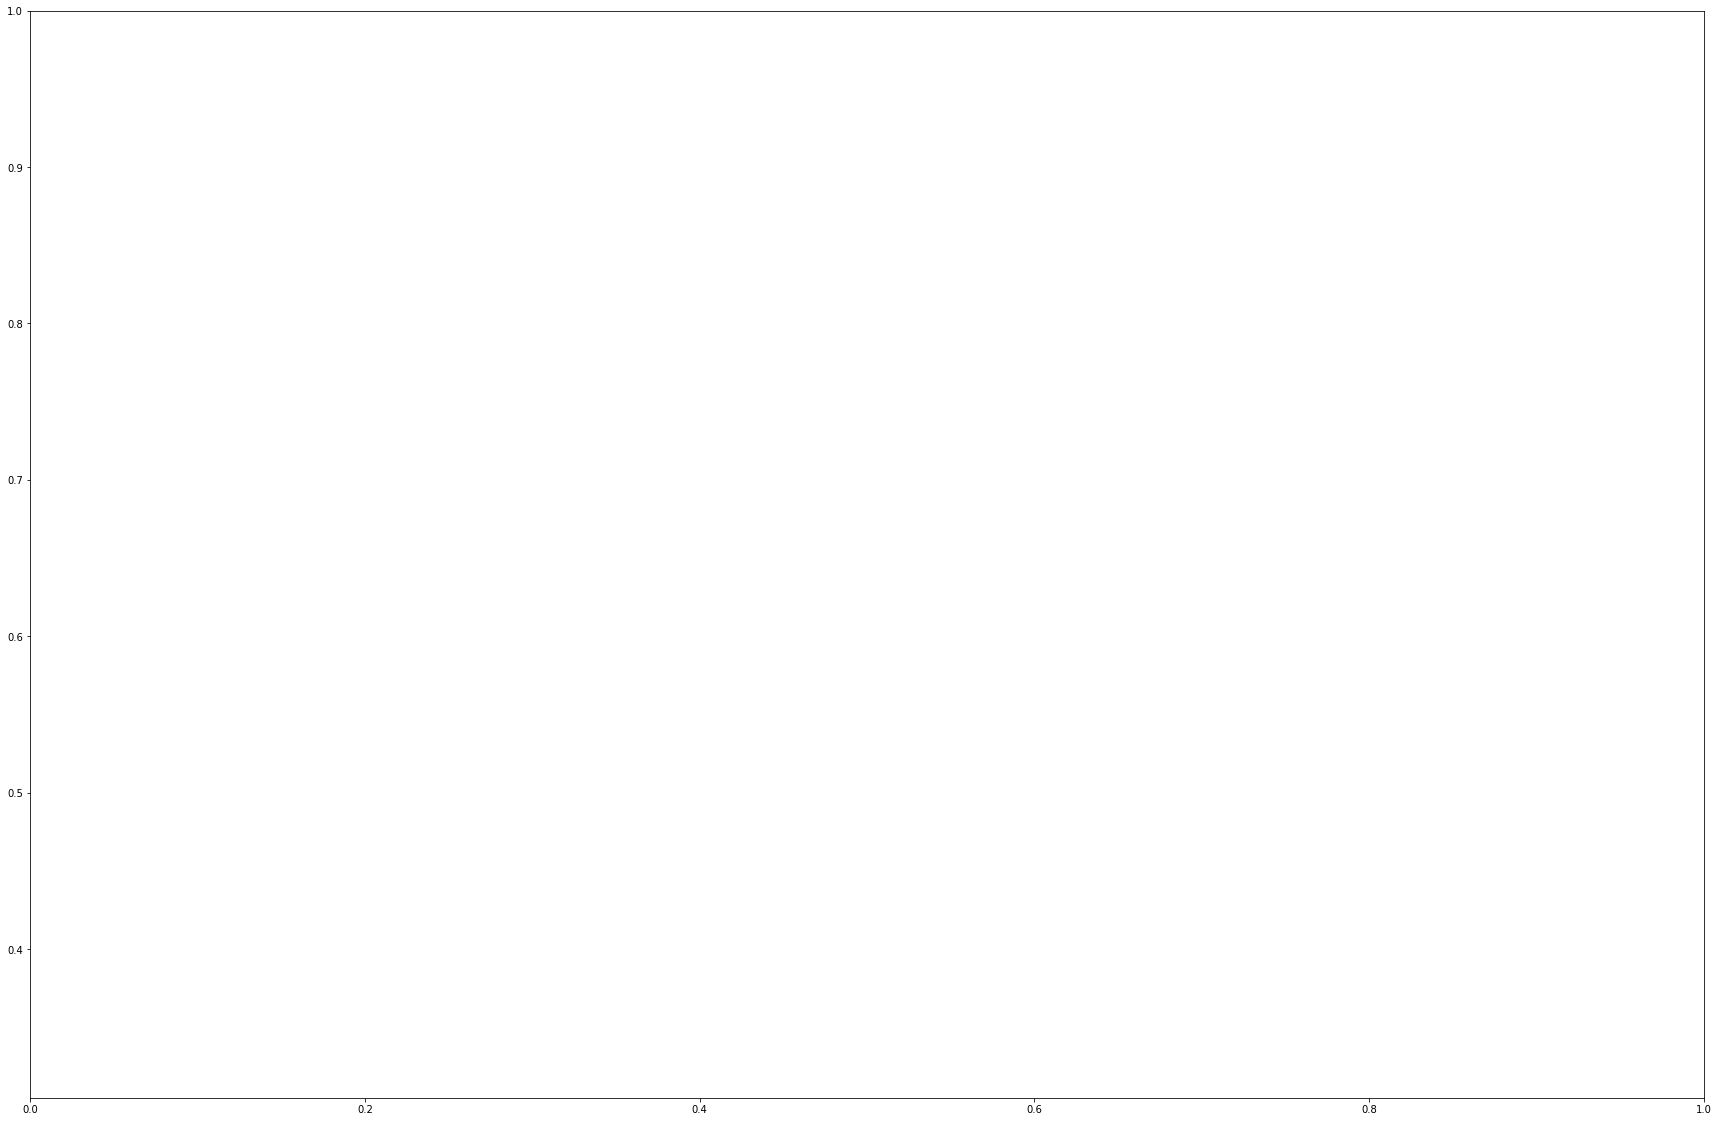

In [331]:
'''
plot_bar_x()
'''